In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv(r"C:\Users\yajam\OneDrive\Documents\bdp\gld_price_data.csv")


In [7]:
import os
print(os.getcwd())

C:\Users\yajam\RM


In [8]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# columns, rows
data.shape

(2290, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
data.head(1)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.18,1.471692


In [15]:
#cek outlier
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# 1: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# 2: Handle missing values (imputation with forward fill for simplicity)
data.fillna(method='ffill', inplace=True)

# 3: Normalize or scale data (Using Min-Max Scaling for this example)
scaler = MinMaxScaler()
scaled_data = data.copy()
scaled_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']] = scaler.fit_transform(data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']])

# 4: Check for outliers using Z-score method
z_scores = zscore(data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']])
outliers = (z_scores > 3).sum(axis=0)  # Consider a Z-score > 3 as an outlier

print("\nOutliers Count:\n", outliers)
print("\nScaled Data Preview:\n", scaled_data.head())

# # Save the cleaned and scaled data if needed
# scaled_data.to_csv('preprocessed_data.csv', index=False)


Missing Values:
 Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Outliers Count:
 SPX         0
GLD         0
USO        63
SLV        10
EUR/USD     0
dtype: int64

Scaled Data Preview:
        Date       SPX       GLD       USO       SLV   EUR/USD
0  1/2/2008  0.350870  0.129680  0.643809  0.164801  0.772924
1  1/3/2008  0.350870  0.135876  0.642896  0.167535  0.777924
2  1/4/2008  0.334693  0.132036  0.633218  0.164462  0.779713
3  1/7/2008  0.336765  0.128894  0.616691  0.161494  0.766862
4  1/8/2008  0.324931  0.146435  0.621804  0.175475  0.925504


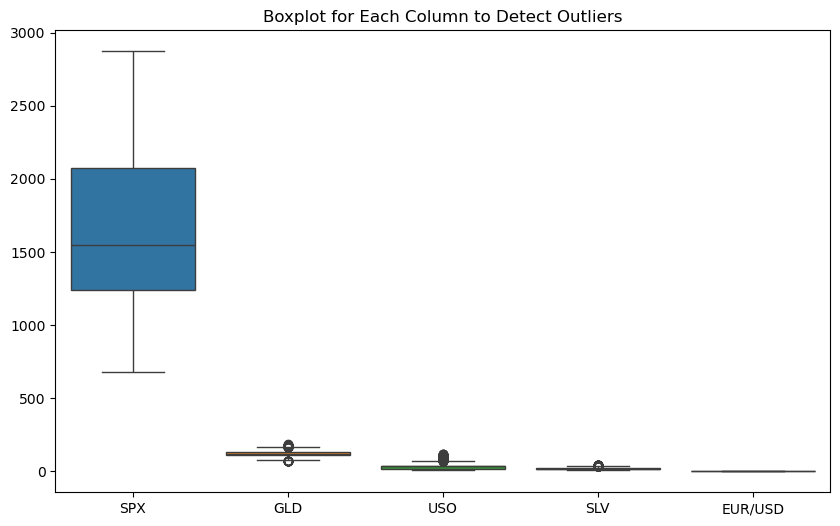

In [31]:
# Convert columns to numeric values
data['SPX'] = pd.to_numeric(data['SPX'], errors='coerce')
data['GLD'] = pd.to_numeric(data['GLD'], errors='coerce')
data['USO'] = pd.to_numeric(data['USO'], errors='coerce')
data['SLV'] = pd.to_numeric(data['SLV'], errors='coerce')
data['EUR/USD'] = pd.to_numeric(data['EUR/USD'], errors='coerce')
plt.figure(figsize=(10, 6))

# Plot boxplots for each column
sns.boxplot(data=data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']])
plt.title('Boxplot for Each Column to Detect Outliers')
plt.show()


<Axes: >

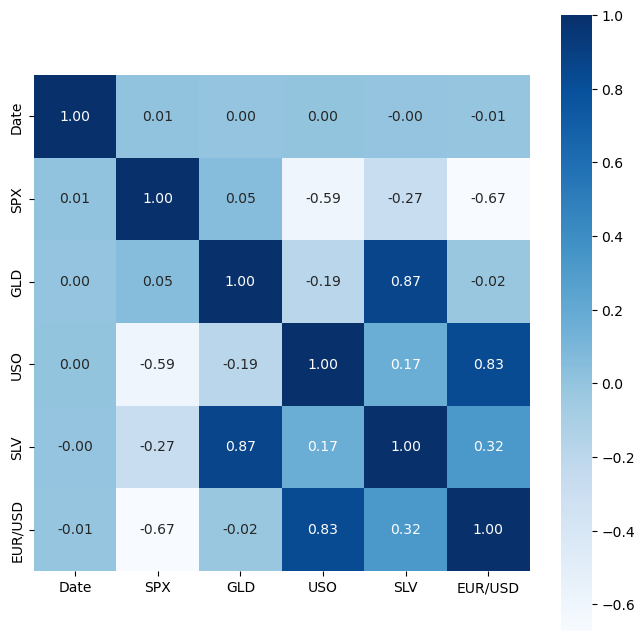

In [33]:
correlation = data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':10}, cmap='Blues')

<Axes: xlabel='GLD', ylabel='Count'>

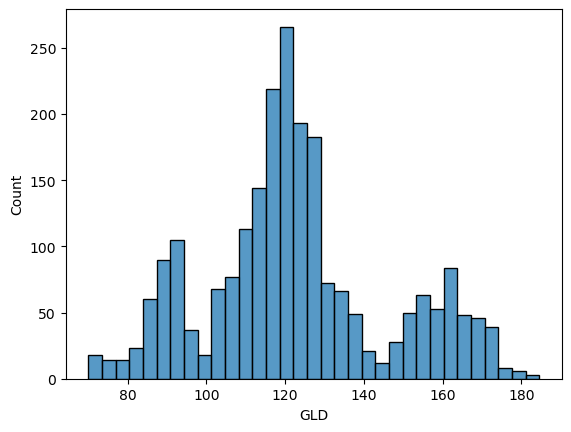

In [35]:
correlation['GLD']
# Check distribution of gold prices over time
sns.histplot(data['GLD'])

In [36]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-02-01,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-03-01,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-04-01,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-07-01,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-08-01,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
#feature matrix
X = data.drop(['Date','GLD'], axis = 1)
#target
y = data['GLD']

In [38]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [39]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [40]:
#train
from sklearn.model_selection import train_test_split

In [42]:
print(data.dtypes) 


Date       datetime64[ns]
SPX               float64
GLD               float64
USO               float64
SLV               float64
EUR/USD           float64
dtype: object


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
#new
# Import the necessary library for splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

# Split the dataset (X, y) into training (X_train, y_train) and testing sets (X_test, y_test)
# We are using 80% of the data for training and 20% for testing. The random_state ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Import libraries for different regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Initialize the models
lr = LinearRegression()  
rf = RandomForestRegressor()  
xgb = GradientBoostingRegressor()  
xg = XGBRegressor()  

# Fit each model to the training data (X_train, y_train)
lr.fit(X_train, y_train)  
rf.fit(X_train, y_train)  
xgb.fit(X_train, y_train) 
xg.fit(X_train, y_train)  

# Use each trained model to predict the target values (y_pred) on the test set (X_test)
y_pred1 = lr.predict(X_test)  
y_pred2 = rf.predict(X_test)  
y_pred3 = xgb.predict(X_test) 
y_pred4 = xg.predict(X_test)  

# Import metrics module for evaluation
from sklearn import metrics

# Evaluate the performance of each model using R-squared (R²) score, which measures how well the model explains the variance in the data
score1 = metrics.r2_score(y_test, y_pred1) 
score2 = metrics.r2_score(y_test, y_pred2) 
score3 = metrics.r2_score(y_test, y_pred3) 
score4 = metrics.r2_score(y_test, y_pred4) 

# Print the R² scores for each model to compare performance
print(score1, score2, score3, score4)


0.8975640982991402 0.9897105366555075 0.980246878878976 0.9885715958139172


In [46]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)


In [47]:
from sklearn import metrics

In [48]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

print(score1, score2, score3, score4) 

0.8975640982991402 0.9902068814538253 0.9802906368299772 0.9885715958139172


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Linear Regression
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y_test, y_pred1)

# Random Forest
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_test, y_pred2)

# Gradient Boosting
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
mae3 = mean_absolute_error(y_test, y_pred3)

# XGBoost
mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
mae4 = mean_absolute_error(y_test, y_pred4)

# huzzil
print("Linear Regression:     R2 =", score1, "MSE =", mse1, "RMSE =", rmse1, "MAE =", mae1)
print("Random Forest:         R2 =", score2, "MSE =", mse2, "RMSE =", rmse2, "MAE =", mae2)
print("Gradient Boosting:     R2 =", score3, "MSE =", mse3, "RMSE =", rmse3, "MAE =", mae3)
print("XGBoost:               R2 =", score4, "MSE =", mse4, "RMSE =", rmse4, "MAE =", mae4)


Linear Regression:     R2 = 0.8975640982991402 MSE = 56.16559421500604 RMSE = 7.494370835167288 MAE = 5.695900644269291
Random Forest:         R2 = 0.9902068814538253 MSE = 5.36956587710966 RMSE = 2.3172323744306826 MAE = 1.2573934457205265
Gradient Boosting:     R2 = 0.9802906368299772 MSE = 10.806641769761406 RMSE = 3.287345702806659 MAE = 2.1913847285439205
XGBoost:               R2 = 0.9885715958139172 MSE = 6.266192822854938 RMSE = 2.5032364696238623 MAE = 1.371212750236678


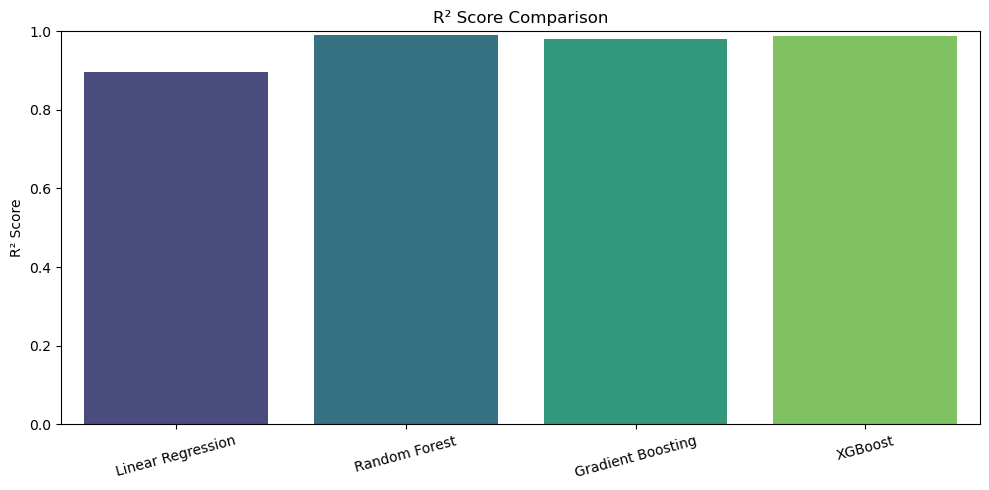

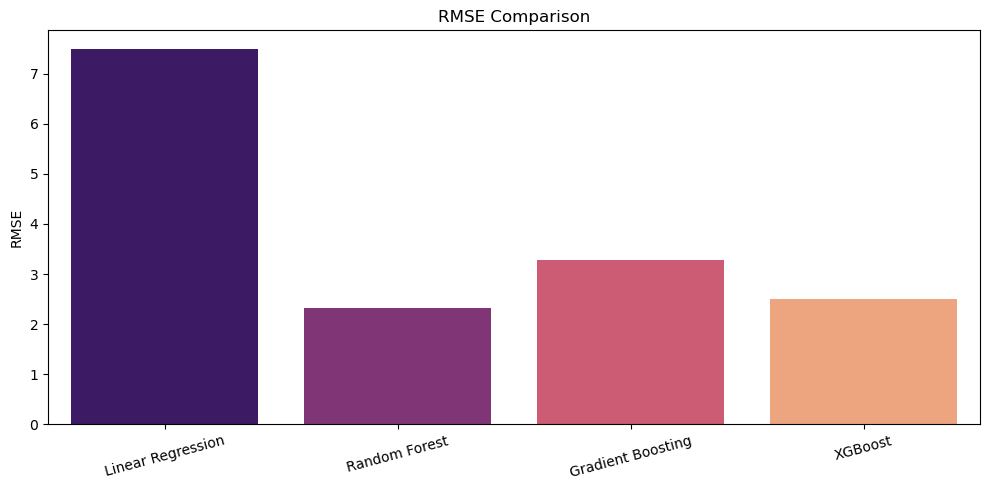

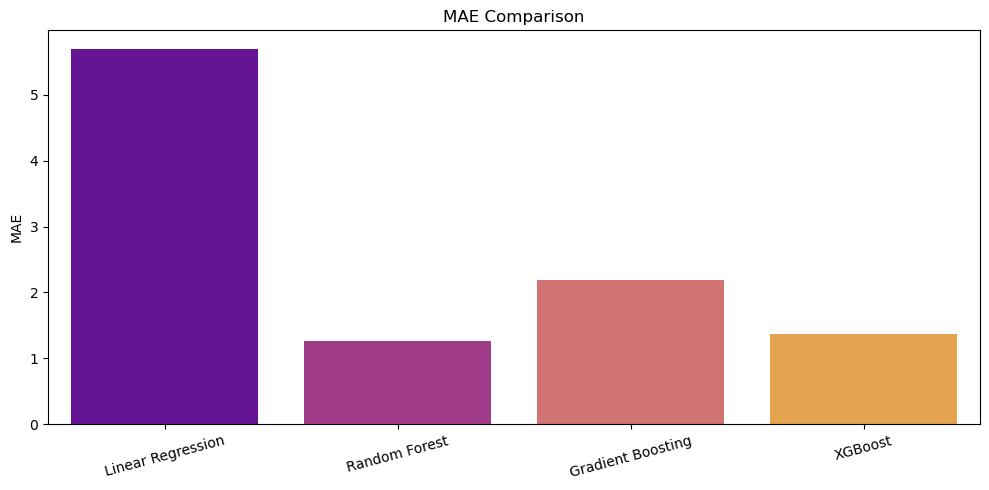

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# Your calculated scores
r2_scores = [0.8975640982991402, 0.9902068814538253, 0.9802906368299772, 0.9885715958139172]
rmse_scores = [7.494370835167288, 2.3172323744306826, 3.287345702806659, 2.5032364696238623]
mae_scores = [5.695900644269291, 1.2573934457205265, 2.1913847285439205, 1.371212750236678]
mse_scores = [56.16559421500604, 5.36956587710966, 10.806641769761406, 6.266192822854938]

# Plot R² Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=15)
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=rmse_scores, palette='magma')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=mae_scores, palette='plasma')
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


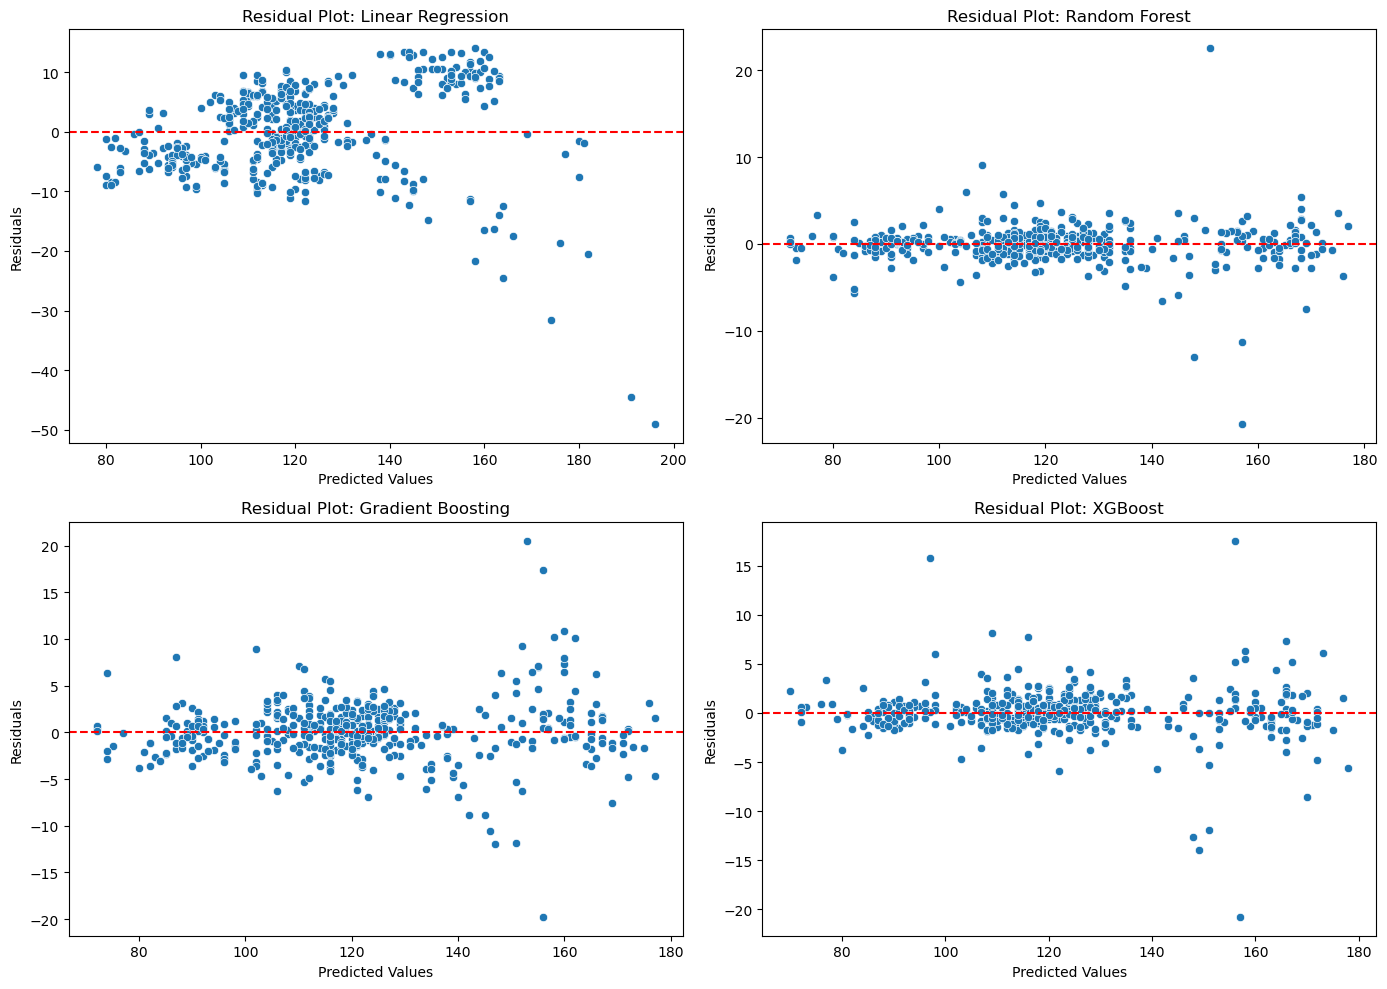

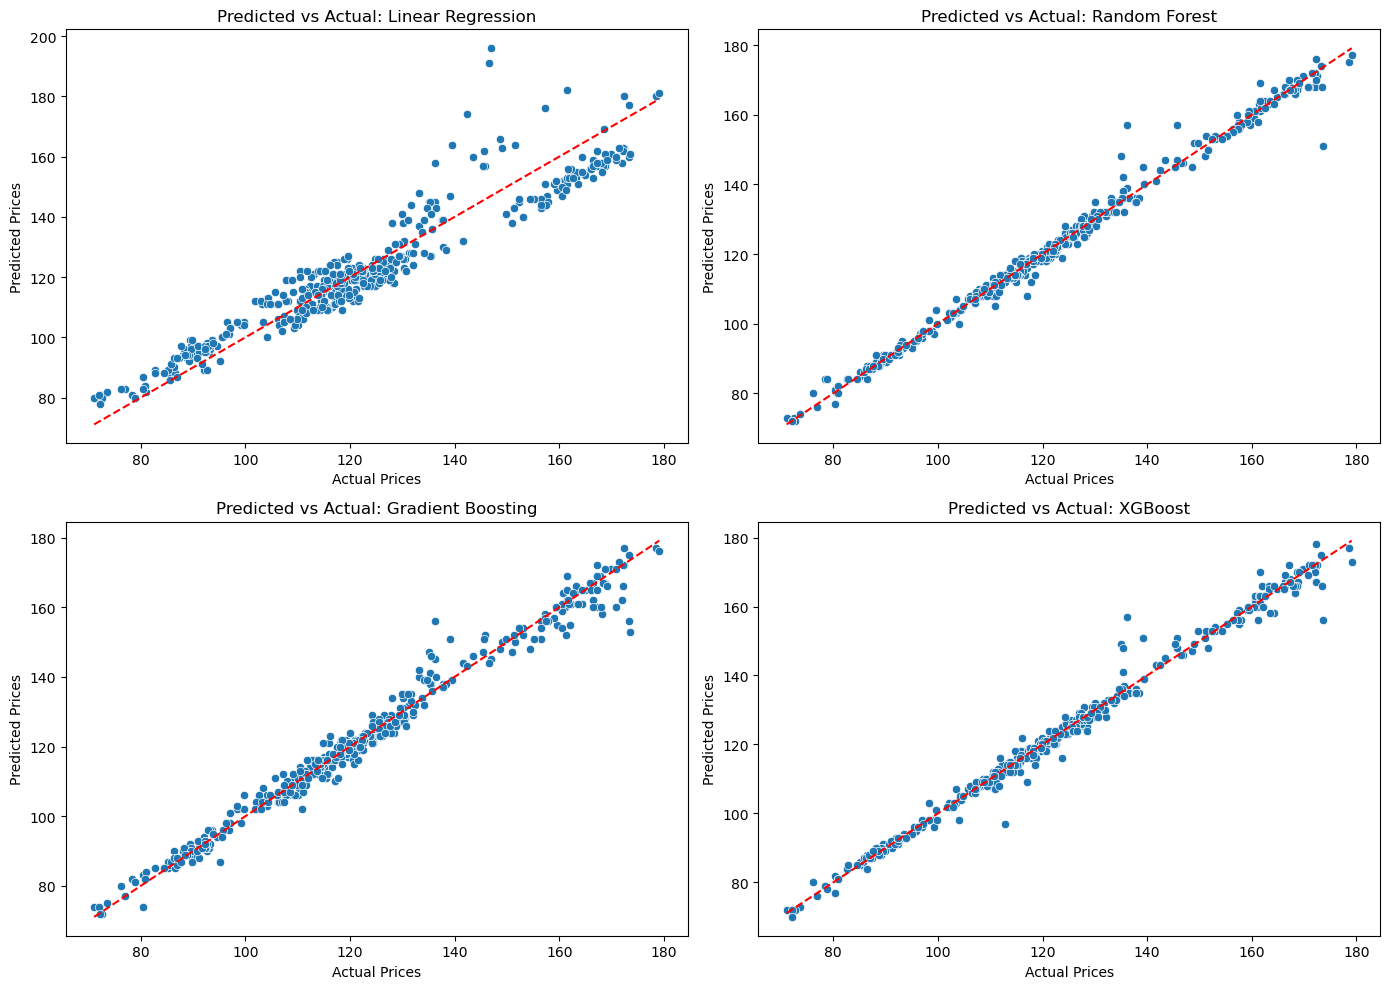

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names and predictions
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
predictions = [y_pred1, y_pred2, y_pred3, y_pred4]

# Set up subplots for residual plots
plt.figure(figsize=(14, 10))
for i, pred in enumerate(predictions):
    residuals = y_test - pred
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual Plot: {models[i]}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Set up subplots for predicted vs actual
plt.figure(figsize=(14, 10))
for i, pred in enumerate(predictions):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=y_test, y=pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
    plt.title(f'Predicted vs Actual: {models[i]}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()


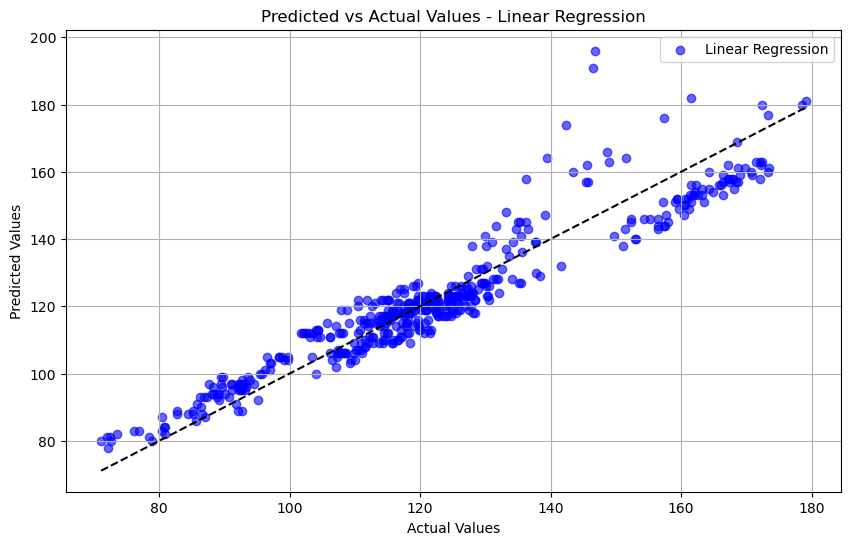

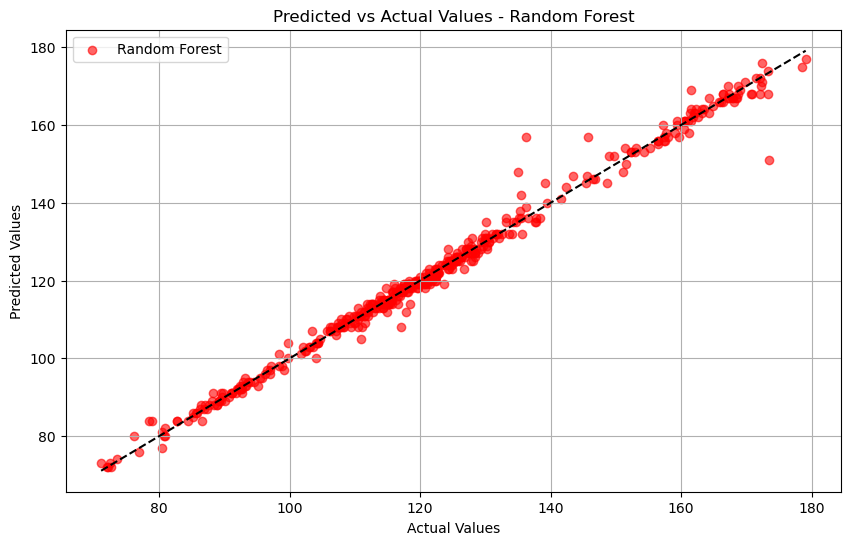

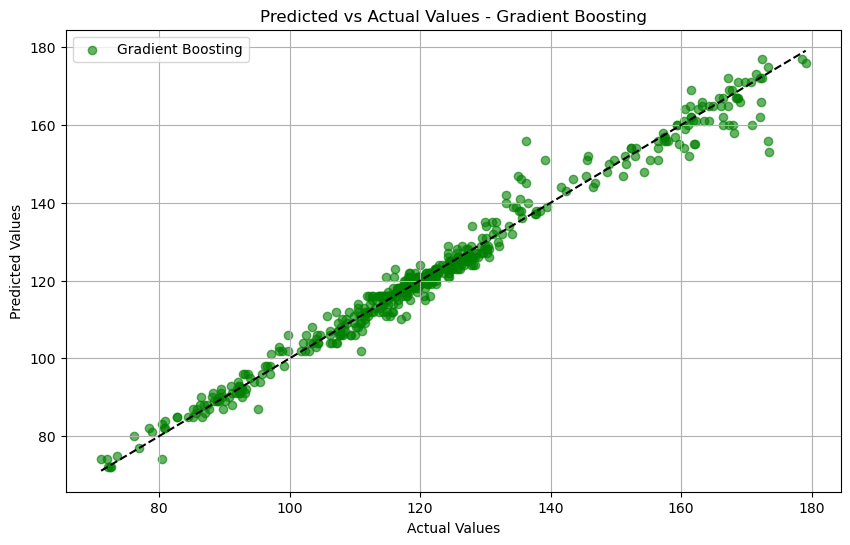

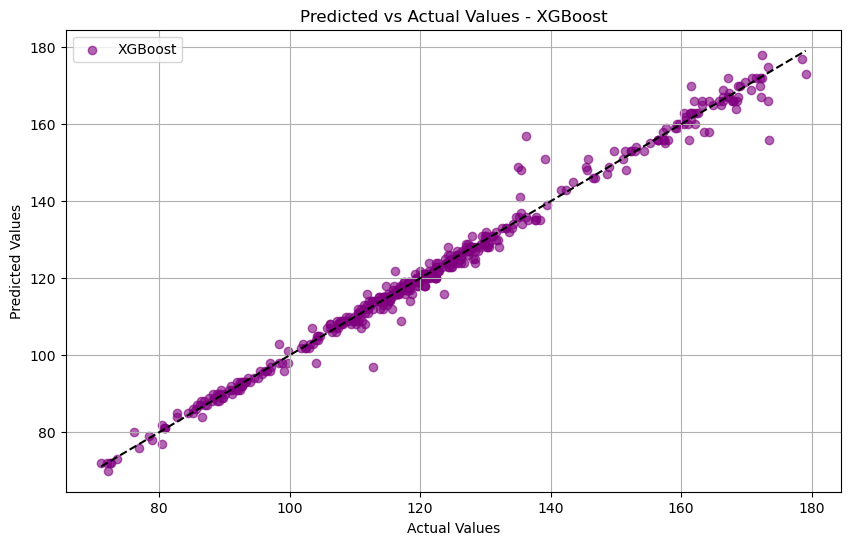

In [72]:
import matplotlib.pyplot as plt

# 1. Linear Regression - Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, color='blue', label='Linear Regression', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# 2. Random Forest - Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred2, color='red', label='Random Forest', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# 3. Gradient Boosting - Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred3, color='green', label='Gradient Boosting', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

# 4. XGBoost - Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred4, color='purple', label='XGBoost', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - XGBoost')
plt.legend()
plt.grid(True)
plt.show()



In [73]:

# Define thresholds based on quantiles of the actual test data (y_test)
low_threshold = np.percentile(y_test, 33)
high_threshold = np.percentile(y_test, 66)

def categorize_predictions(y_pred):
    categories = []
    for value in y_pred:
        if value < low_threshold:
            categories.append('Low')
        elif value < high_threshold:
            categories.append('Medium')
        else:
            categories.append('High')
    return categories

# Categorize predictions for each model
y_pred1_cat = categorize_predictions(y_pred1)
y_pred2_cat = categorize_predictions(y_pred2)
y_pred3_cat = categorize_predictions(y_pred3)
y_pred4_cat = categorize_predictions(y_pred4)

# Compare predicted categories with actual categories
y_test_cat = categorize_predictions(y_test)

# Generate confusion matrices for each model
conf_matrix1 = confusion_matrix(y_test_cat, y_pred1_cat, labels=['Low', 'Medium', 'High'])
conf_matrix2 = confusion_matrix(y_test_cat, y_pred2_cat, labels=['Low', 'Medium', 'High'])
conf_matrix3 = confusion_matrix(y_test_cat, y_pred3_cat, labels=['Low', 'Medium', 'High'])
conf_matrix4 = confusion_matrix(y_test_cat, y_pred4_cat, labels=['Low', 'Medium', 'High'])

# Display confusion matrices
print("Confusion Matrix for Linear Regression:")
print(conf_matrix1)
print("\nConfusion Matrix for Random Forest:")
print(conf_matrix2)
print("\nConfusion Matrix for Gradient Boosting:")
print(conf_matrix3)
print("\nConfusion Matrix for XGBoost:")
print(conf_matrix4)


Confusion Matrix for Linear Regression:
[[130  21   0]
 [ 23 123   5]
 [  0  27 129]]

Confusion Matrix for Random Forest:
[[143   8   0]
 [  5 139   7]
 [  0   5 151]]

Confusion Matrix for Gradient Boosting:
[[141  10   0]
 [  8 137   6]
 [  0  10 146]]

Confusion Matrix for XGBoost:
[[142   9   0]
 [  5 140   6]
 [  0   8 148]]


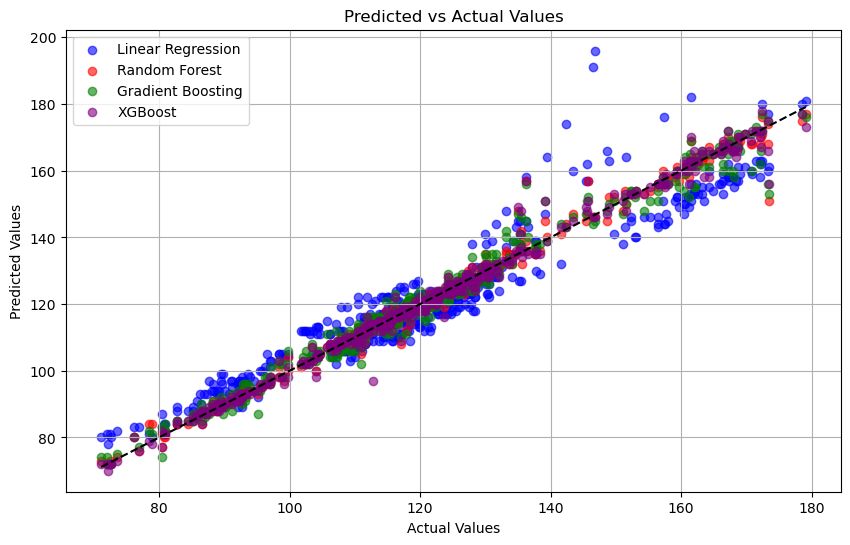

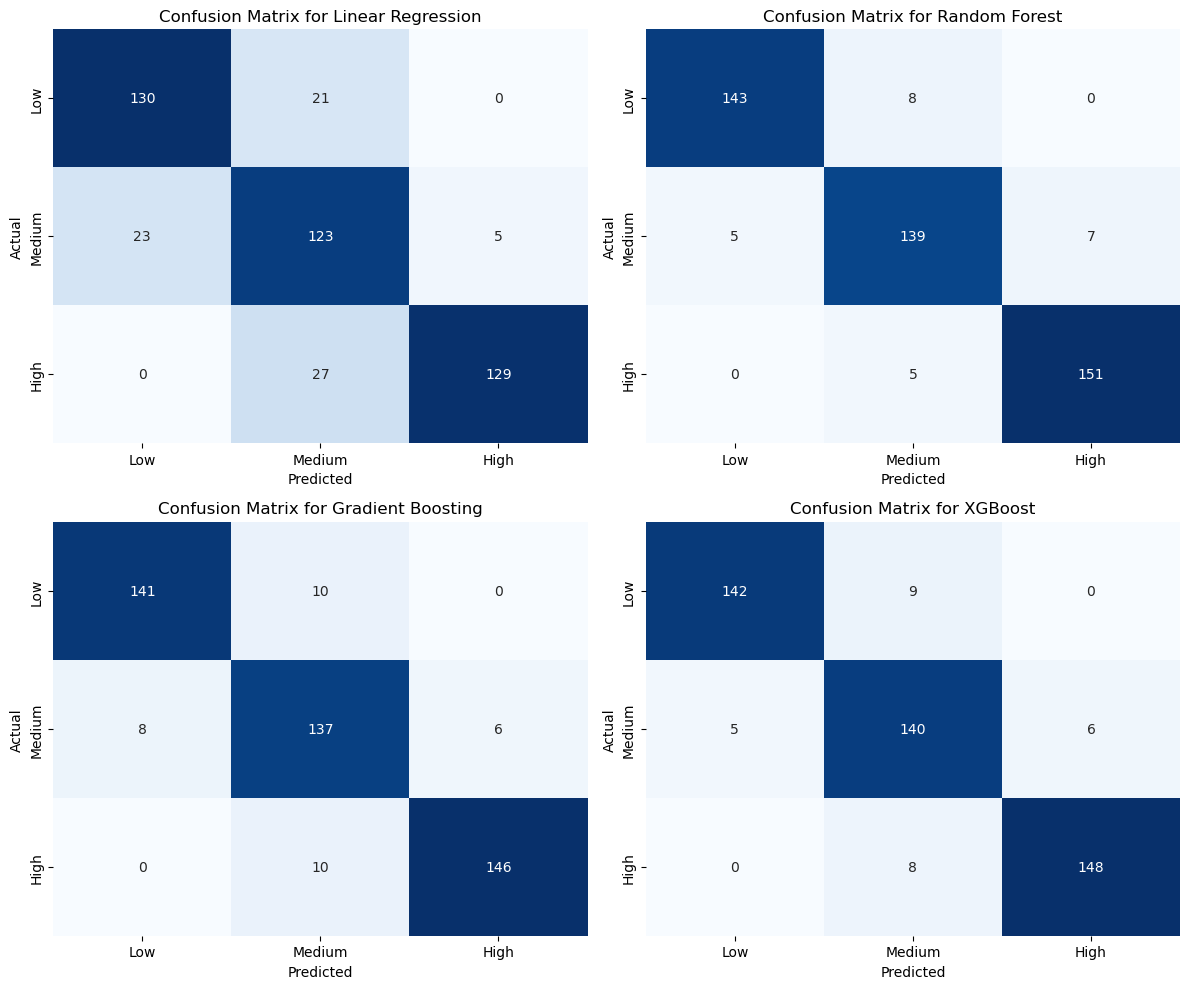

In [74]:


# Let's assume X_train, X_test, y_train, y_test are defined and the models are already trained.

# Define thresholds based on quantiles of the actual test data (y_test)
low_threshold = np.percentile(y_test, 33)
high_threshold = np.percentile(y_test, 66)

def categorize_predictions(y_pred):
    categories = []
    for value in y_pred:
        if value < low_threshold:
            categories.append('Low')
        elif value < high_threshold:
            categories.append('Medium')
        else:
            categories.append('High')
    return categories

# Categorize predictions for each model
y_pred1_cat = categorize_predictions(y_pred1)
y_pred2_cat = categorize_predictions(y_pred2)
y_pred3_cat = categorize_predictions(y_pred3)
y_pred4_cat = categorize_predictions(y_pred4)

# Compare predicted categories with actual categories
y_test_cat = categorize_predictions(y_test)

# Generate confusion matrices for each model
conf_matrix1 = confusion_matrix(y_test_cat, y_pred1_cat, labels=['Low', 'Medium', 'High'])
conf_matrix2 = confusion_matrix(y_test_cat, y_pred2_cat, labels=['Low', 'Medium', 'High'])
conf_matrix3 = confusion_matrix(y_test_cat, y_pred3_cat, labels=['Low', 'Medium', 'High'])
conf_matrix4 = confusion_matrix(y_test_cat, y_pred4_cat, labels=['Low', 'Medium', 'High'])

# Plotting Scatter Plot: Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred2, color='red', label='Random Forest', alpha=0.6)
plt.scatter(y_test, y_pred3, color='green', label='Gradient Boosting', alpha=0.6)
plt.scatter(y_test, y_pred4, color='purple', label='XGBoost', alpha=0.6)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Confusion Matrix-like Heatmaps
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Linear Regression Confusion Matrix
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'], ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for Linear Regression')
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'], ax=ax[0, 1])
ax[0, 1].set_title('Confusion Matrix for Random Forest')
ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

# Gradient Boosting Confusion Matrix
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'], ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for Gradient Boosting')
ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

# XGBoost Confusion Matrix
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'], ax=ax[1, 1])
ax[1, 1].set_title('Confusion Matrix for XGBoost')
ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define models as a dictionary
models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Fit and predict for each model
y_pred_rf = models['Random Forest'].fit(X_train, y_train).predict(X_test)
y_pred_lr = models['Linear Regression'].fit(X_train, y_train).predict(X_test)
y_pred_xgb = models['XGBoost'].fit(X_train, y_train).predict(X_test)
y_pred_gb = models['Gradient Boosting'].fit(X_train, y_train).predict(X_test)

# Calculate the absolute errors for each model
errors_rf = np.abs(y_test - y_pred_rf)
errors_lr = np.abs(y_test - y_pred_lr)
errors_xgb = np.abs(y_test - y_pred_xgb)
errors_gb = np.abs(y_test - y_pred_gb)

# Combine the errors into one DataFrame for all models
error_analysis = pd.DataFrame({
    'Actual': y_test,
    'Predicted_RF': y_pred_rf,
    'Error_RF': errors_rf,
    'Predicted_LR': y_pred_lr,
    'Error_LR': errors_lr,
    'Predicted_XGB': y_pred_xgb,
    'Error_XGB': errors_xgb,
    'Predicted_GB': y_pred_gb,
    'Error_GB': errors_gb
})

# Sort by largest errors for analysis (for all models)
top_errors_rf = error_analysis.sort_values(by='Error_RF', ascending=False).head(10)
top_errors_lr = error_analysis.sort_values(by='Error_LR', ascending=False).head(10)
top_errors_xgb = error_analysis.sort_values(by='Error_XGB', ascending=False).head(10)
top_errors_gb = error_analysis.sort_values(by='Error_GB', ascending=False).head(10)

# Print top 10 errors for each model
print("Top 10 Errors for Random Forest:")
print(top_errors_rf[['Actual', 'Predicted_RF', 'Error_RF']])

print("\nTop 10 Errors for Linear Regression:")
print(top_errors_lr[['Actual', 'Predicted_LR', 'Error_LR']])

print("\nTop 10 Errors for XGBoost:")
print(top_errors_xgb[['Actual', 'Predicted_XGB', 'Error_XGB']])

print("\nTop 10 Errors for Gradient Boosting:")
print(top_errors_gb[['Actual', 'Predicted_GB', 'Error_GB']])


Top 10 Errors for Random Forest:
          Actual  Predicted_RF   Error_RF
840   173.529999    152.139601  21.390398
705   136.240005    155.588000  19.347995
650   135.020004    149.093401  14.073397
1801  117.110001    108.113401   8.996600
636   139.110001    148.100201   8.990200
764   145.729996    154.239701   8.509705
845   173.360001    166.066600   7.293401
785   161.490005    167.501301   6.011296
1803  117.769997    112.093400   5.676597
416   110.949997    105.341300   5.608697

Top 10 Errors for Linear Regression:
         Actual  Predicted_LR   Error_LR
729  146.869995    196.115024  49.245029
727  146.500000    190.877660  44.377660
719  142.380005    174.100771  31.720766
700  139.410004    164.317145  24.907141
705  136.240005    158.449308  22.209303
785  161.490005    181.507524  20.017519
782  157.320007    175.679565  18.359558
746  148.589996    166.332600  17.742604
736  143.470001    159.544335  16.074334
744  145.649994    161.601997  15.952003

Top 10 Errors f

In [92]:
import pandas as pd

# Displaying the top 10 errors for each model as a DataFrame in a Jupyter Notebook
print("Top 10 Errors for Random Forest:")
display(top_errors_rf[['Actual', 'Predicted_RF', 'Error_RF']])

print("\nTop 10 Errors for Linear Regression:")
display(top_errors_lr[['Actual', 'Predicted_LR', 'Error_LR']])

print("\nTop 10 Errors for XGBoost:")
display(top_errors_xgb[['Actual', 'Predicted_XGB', 'Error_XGB']])

print("\nTop 10 Errors for Gradient Boosting:")
display(top_errors_gb[['Actual', 'Predicted_GB', 'Error_GB']])


Top 10 Errors for Random Forest:


,Actual,Predicted_RF,Error_RF
840,173.529999,152.139601,21.390398
705,136.240005,155.588000,19.347995
650,135.020004,149.093401,14.073397
1801,117.110001,108.113401,8.996600
636,139.110001,148.100201,8.990200
764,145.729996,154.239701,8.509705
845,173.360001,166.066600,7.293401
785,161.490005,167.501301,6.011296
1803,117.769997,112.093400,5.676597
416,110.949997,105.341300,5.608697



Top 10 Errors for Linear Regression:


,Actual,Predicted_LR,Error_LR
729,146.869995,196.115024,49.245029
727,146.500000,190.877660,44.377660
719,142.380005,174.100771,31.720766
700,139.410004,164.317145,24.907141
705,136.240005,158.449308,22.209303
785,161.490005,181.507524,20.017519
782,157.320007,175.679565,18.359558
746,148.589996,166.332600,17.742604
736,143.470001,159.544335,16.074334
744,145.649994,161.601997,15.952003



Top 10 Errors for XGBoost:


,Actual,Predicted_XGB,Error_XGB
705,136.240005,156.505478,20.265473
840,173.529999,155.787308,17.742691
507,112.750000,96.871208,15.878792
650,135.020004,149.294327,14.274323
632,135.419998,147.557526,12.137528
636,139.110001,151.185898,12.075897
785,161.490005,169.618774,8.128769
2281,123.709999,116.027176,7.682823
1801,117.110001,109.453697,7.656304
845,173.360001,165.892471,7.467530



Top 10 Errors for Gradient Boosting:


,Actual,Predicted_GB,Error_GB
840,173.529999,153.292613,20.237386
705,136.240005,156.330943,20.090938
845,173.360001,155.821284,17.538717
636,139.110001,150.934213,11.824212
650,135.020004,146.544069,11.524065
838,170.850006,160.266361,10.583645
859,168.179993,157.872620,10.307373
841,172.070007,161.932782,10.137225
632,135.419998,145.510071,10.090073
888,161.220001,151.577281,9.642720


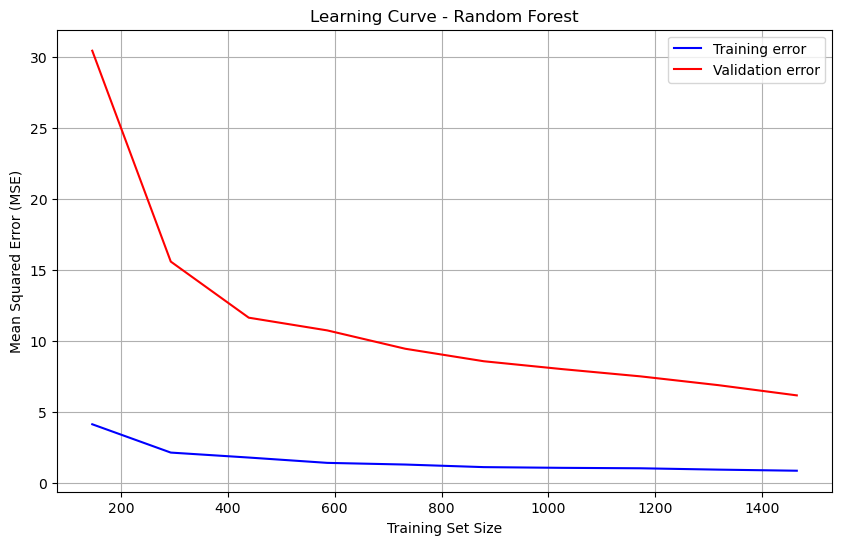

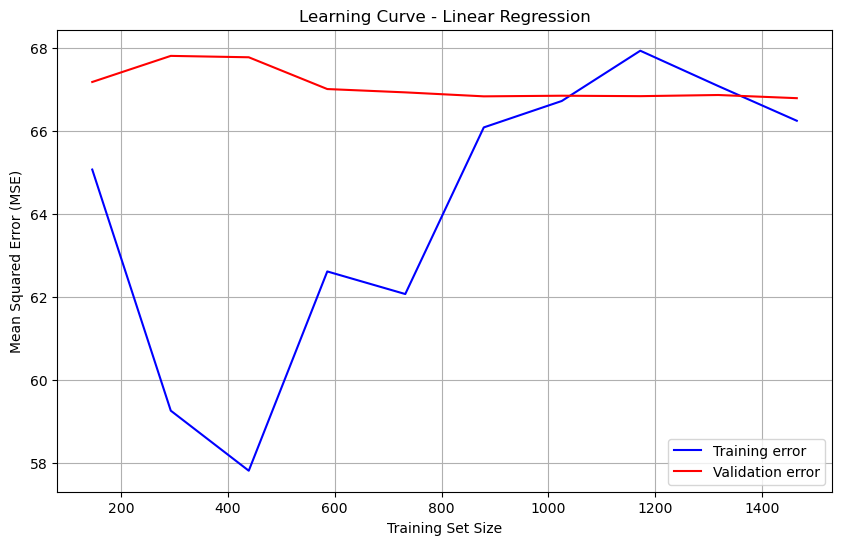

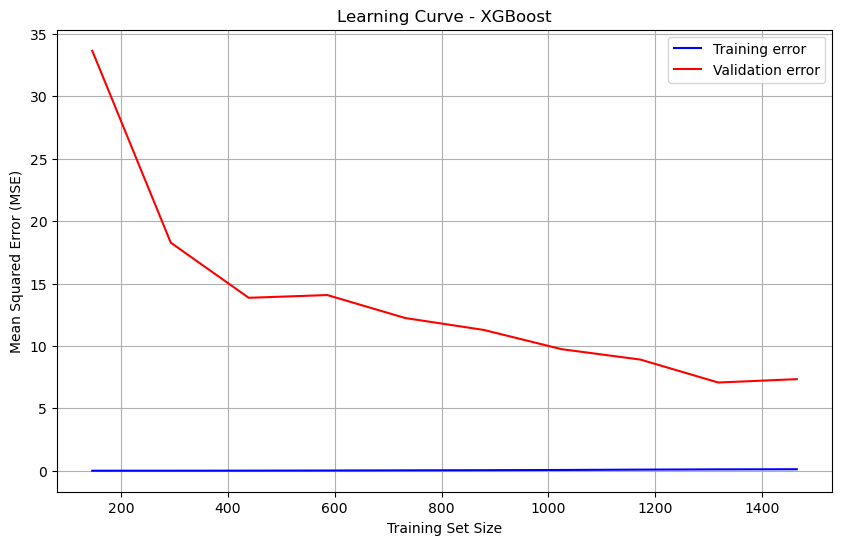

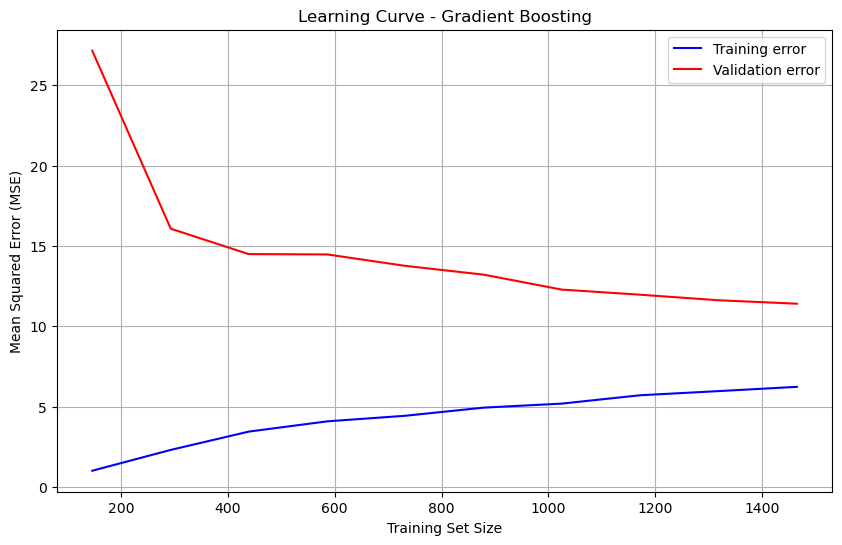

In [89]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curves for each model
def plot_learning_curve(model, model_name, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', 
        train_sizes=np.linspace(0.1, 1.0, 10)  # Training sizes from 10% to 100%
    )
    
    train_scores_mean = -train_scores.mean(axis=1)  # Convert to positive MSE
    test_scores_mean = -test_scores.mean(axis=1)    # Convert to positive MSE

    # Plotting the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training error", color="blue")
    plt.plot(train_sizes, test_scores_mean, label="Validation error", color="red")
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves for each model
plot_learning_curve(models['Random Forest'], 'Random Forest', X_train, y_train)
plot_learning_curve(models['Linear Regression'], 'Linear Regression', X_train, y_train)
plot_learning_curve(models['XGBoost'], 'XGBoost', X_train, y_train)
plot_learning_curve(models['Gradient Boosting'], 'Gradient Boosting', X_train, y_train)


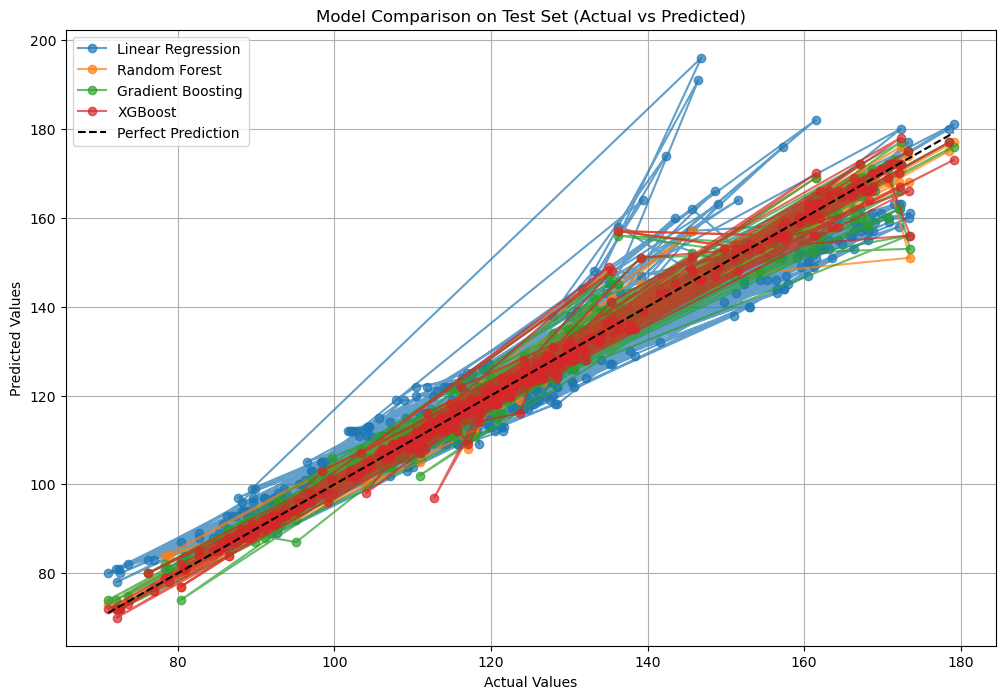

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Actual vs Predicted for Each Model
plt.figure(figsize=(12, 8))

# Actual vs Predicted for Linear Regression
plt.plot(y_test, y_pred1, label='Linear Regression', marker='o', linestyle='-', alpha=0.7)

# Actual vs Predicted for Random Forest
plt.plot(y_test, y_pred2, label='Random Forest', marker='o', linestyle='-', alpha=0.7)

# Actual vs Predicted for Gradient Boosting
plt.plot(y_test, y_pred3, label='Gradient Boosting', marker='o', linestyle='-', alpha=0.7)

# Actual vs Predicted for XGBoost
plt.plot(y_test, y_pred4, label='XGBoost', marker='o', linestyle='-', alpha=0.7)

# Plotting the Perfect Prediction line (Actual = Predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Comparison on Test Set (Actual vs Predicted)')
plt.legend()
plt.grid(True)
plt.show()
